# Average Annual Temperature
***
### Seattle, WA - 1850 thru 2013
***
This is a basic analysis of the annual temperature over time in Seattle, Washington from 1850 until 2013.<br>
While there's nothing statistically "earth-shaking" here, it's a good example of data wrangling.<br>
This project uses Pandas, MatPlotLib and Seaborn libraries, as well as a few platform-agnostic techniques.<br>
Data was furnished by Berkley Earth via Kaggle.

***

### Load packages and initialize notebook

In [1]:
import pandas as pd
import numpy as np
import os ### simple folder navigation
from pathlib import Path ### Windows file path encapsulator
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.3f}'.format ### default decimal precision
pd.set_option('display.max_columns', None) ### Pad-out margins ### pd.reset_option('max_columns') to reset
pd.set_option('display.max_rows', None) ### Pad-out margins ### pd.reset_option('max_rows') to reset

<div class="alert alert-block alert-info">
<b>Note:</b> Local folders were addressed in pathlib.Path() function -- omitted here for privacy.</div>

***

### Load data

In [3]:
### Load data set into python from local dowload location
dfCity = pd.read_csv(folderstring / 'GlobalLandTemperaturesByCity.csv',low_memory=False)
###Quick look at raw data
dfCity.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


***

### Data cleaning and re-formatting

In [4]:
### Isolate example city
dfCity['dt'] = pd.to_datetime(dfCity['dt'])
dfSeattle = dfCity[(dfCity['City'] == 'Seattle') & (dfCity['dt'] >= '1850-01-01')]
dfSEA = dfSeattle.copy(deep = True).rename(columns = {
    'AverageTemperature':'AvgTemp'
    , 'AverageTemperatureUncertainty': 'AvgTempVar'
    , 'dt': 'Date'
})
dfSEA['Year'] = dfSeattle['dt'].dt.year ### add column for later join/merge
dfSEA.head()

,Date,AvgTemp,AvgTempVar,City,Country,Latitude,Longitude,Year
6830403,1850-01-01,-0.981,1.647,Seattle,United States,47.42N,121.97W,1850
6830404,1850-02-01,1.552,1.346,Seattle,United States,47.42N,121.97W,1850
6830405,1850-03-01,1.261,3.354,Seattle,United States,47.42N,121.97W,1850
6830406,1850-04-01,7.776,4.881,Seattle,United States,47.42N,121.97W,1850
6830407,1850-05-01,10.359,3.442,Seattle,United States,47.42N,121.97W,1850


In [5]:
### Add annual averages
dfSEA_y = dfSEA.groupby(by = [
    'City'
    ,'Country'
    ,'Latitude'
    ,'Longitude'
]).resample('AS'
            , on = 'Date'
            , label = 'left'
            , closed = 'left'
           ).mean().reset_index().rename(columns = {
    'AvgTemp':'AnnlAvgTemp'
    ,'AvgTempVar':'AnnlAvgTempVar'
})
dfSEAw = dfSEA.merge(dfSEA_y[['Year','AnnlAvgTemp','AnnlAvgTempVar']], on = 'Year') ### Merge here
dfSEAw.head()

,Date,AvgTemp,AvgTempVar,City,Country,Latitude,Longitude,Year,AnnlAvgTemp,AnnlAvgTempVar
0,1850-01-01,-0.981,1.647,Seattle,United States,47.42N,121.97W,1850,7.059,2.096
1,1850-02-01,1.552,1.346,Seattle,United States,47.42N,121.97W,1850,7.059,2.096
2,1850-03-01,1.261,3.354,Seattle,United States,47.42N,121.97W,1850,7.059,2.096
3,1850-04-01,7.776,4.881,Seattle,United States,47.42N,121.97W,1850,7.059,2.096
4,1850-05-01,10.359,3.442,Seattle,United States,47.42N,121.97W,1850,7.059,2.096


In [6]:
### Reformat
dfSEAw_l = pd.melt(dfSEAw, id_vars = ['Year','Date','City','Country','Latitude','Longitude']
                   , value_vars = ['AvgTemp','AvgTempVar','AnnlAvgTemp','AnnlAvgTempVar']).rename(
    columns={'variable':'Measure'}
)
dfs = dfSEAw_l.copy(deep = True)
dfs['Fahrenheit'] = dfSEAw_l['value'] * 9 / 5 + 32
dfs['Measure'].replace({'AvgTemp':'Avg Temp','AvgTempVar':'Temp Variance','AnnlAvgTemp':'Annual Avg Temp','AnnlAvgTempVar':'Annual Temp Variance'},inplace=True)
### Lets look at two specific months to verify value types and aggregations
dfs[dfs['Date'].isin(['2007-06-01','2007-07-01']) ].head(10)

,Year,Date,City,Country,Latitude,Longitude,Measure,value,Fahrenheit
1889,2007,2007-06-01,Seattle,United States,47.42N,121.97W,Avg Temp,12.496,54.493
1890,2007,2007-07-01,Seattle,United States,47.42N,121.97W,Avg Temp,17.112,62.802
3854,2007,2007-06-01,Seattle,United States,47.42N,121.97W,Temp Variance,0.256,32.461
3855,2007,2007-07-01,Seattle,United States,47.42N,121.97W,Temp Variance,0.321,32.578
5819,2007,2007-06-01,Seattle,United States,47.42N,121.97W,Annual Avg Temp,8.038,46.469
5820,2007,2007-07-01,Seattle,United States,47.42N,121.97W,Annual Avg Temp,8.038,46.469
7784,2007,2007-06-01,Seattle,United States,47.42N,121.97W,Annual Temp Variance,0.244,32.440
7785,2007,2007-07-01,Seattle,United States,47.42N,121.97W,Annual Temp Variance,0.244,32.440


***

### Configure graphics parameters

In [7]:
### Seaborn paramater packing for plots and figures - sets global plotting variables 
rcPack = {'figure.figsize': (12,6),'axes.facecolor':'whitesmoke', 'axes.edgecolor':'lightgrey'
          , 'axes.labelcolor':'dimgrey', 'grid.color':'lightgrey'
          , 'figure.facecolor':'gainsboro', 'text.color':'dimgrey', 'xtick.color':'dimgrey'
          , 'ytick.color':'dimgrey', 'legend.loc':'upper center'}
errPack = {'visible':'True', 'alpha':0.4, 'linestyle':':', 'linewidth':1.2}

***

### Plotting Results

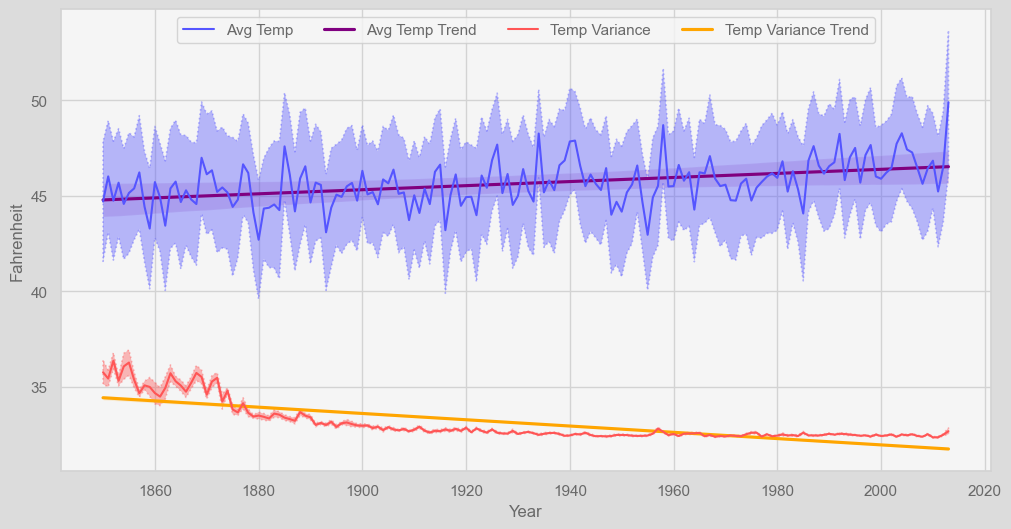

In [8]:
### Simple Lineplot
sns.set_theme()
sns.set(rc=rcPack)
grid = sns.regplot(data = dfs[dfs['Measure'].isin(['Avg Temp'])], scatter=False, label = 'Avg Temp Trend'
                    , x = 'Year', y ='Fahrenheit', color = 'purple', fit_reg=True)
grid = sns.regplot(data = dfs[dfs['Measure'].isin(['Temp Variance'])],scatter=False, label = 'Temp Variance Trend'
                    , x = 'Year', y ='Fahrenheit', color = 'orange', fit_reg=True)
grid = sns.lineplot(data = dfs[dfs['Measure'].isin(['Avg Temp','Temp Variance'])]
                    , x = 'Year', y ='Fahrenheit', palette = 'seismic', hue = 'Measure' , legend='brief'
                    , errorbar = ('se',1), err_kws = errPack)
handles,labels = plt.gca().get_legend_handles_labels()
order = [2,0,3,1]
plt.legend([handles[i] for i in order], [labels[i] for i in order], ncol=4)
plt.show();